Limpieza de datos para predicción del APGAR a los 5 minutos.

In [1]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

1. INTEGRACIÓN

In [2]:
df = pd.read_csv("Nacimientos_ocurridos_en_el_Hospital_General_de_Medell_n_20250517.csv", encoding='latin1')

In [3]:
df.head()


,ANO,PERIODO DE REPORTE,SEXO,PESO (Gramos),TALLA (CentImetros),FECHA NACIMIENTO,PARTO ATENDIDO POR,TIEMPO DE GESTACION,NUMERO CONSULTAS PRENATALES,TIPO PARTO,...,MUNICIPIO RESIDENCIA,AREA RESIDENCIA,LOCALIDAD,NUMERO HIJOS NACIDOS VIVOS,NUMERO EMBARAZOS,REGIMEN SEGURIDAD,NOMBRE ADMINISTRADORA,EDAD PADRE,NIVEL EDUCATIVO PADRE,PROFESION CERTIFICADOR
0,2022,1,FEMENINO,2341.0,44.0,01/01/2022 12:00:00 AM,MEDICO,37.0,7,ESPONTANEO,...,BELLO,CABECERA MUNICIPAL,COMUNA 01,1,1,SUBSIDIADO,SAVIA SALUD E.P.S.,22.0,BASICA SECUNDARIA,MEDICO
1,2022,1,MASCULINO,3750.0,51.0,01/01/2022 12:00:00 AM,MEDICO,40.0,7,ESPONTANEO,...,ANORI,RURAL DISPERSO,SIN INFORMACION,2,4,SUBSIDIADO,SAVIA SALUD E.P.S.,20.0,MEDIA ACADEMICA O CLASICA,MEDICO
2,2022,1,MASCULINO,3527.0,51.0,01/01/2022 12:00:00 AM,MEDICO,38.0,7,ESPONTANEO,...,MEDELLIN,CABECERA MUNICIPAL,SAN JAVIER,1,1,SUBSIDIADO,SAVIA SALUD E.P.S.,50.0,MEDIA ACADEMICA O CLASICA,MEDICO
3,2022,1,FEMENINO,2745.0,47.0,01/01/2022 12:00:00 AM,MEDICO,38.0,4,ESPONTANEO,...,MEDELLIN,CABECERA MUNICIPAL,MANRIQUE,1,1,SUBSIDIADO,SAVIA SALUD E.P.S.,32.0,MEDIA ACADEMICA O CLASICA,MEDICO
4,2022,1,FEMENINO,2315.0,43.0,01/01/2022 12:00:00 AM,MEDICO,35.0,4,ESPONTANEO,...,MEDELLIN,CABECERA MUNICIPAL,VILLA HERMOSA,3,5,SUBSIDIADO,SAVIA SALUD E.P.S.,27.0,BASICA SECUNDARIA,MEDICO


2. SELECCIÓN DE VARIABLES

In [4]:
print("\nColumnas disponibles en el dataset:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")


Columnas disponibles en el dataset:
1. ANO
2. PERIODO DE REPORTE
3. SEXO
4. PESO (Gramos)
5. TALLA (CentImetros)
6. FECHA NACIMIENTO
7. PARTO ATENDIDO POR
8. TIEMPO DE GESTACION
9. NUMERO CONSULTAS PRENATALES
10. TIPO PARTO
11. MULTIPLICIDAD EMBARAZO
12. APGAR1
13. APGAR2
14. GRUPO SANGUINEO
15. FACTOR RH
16. PERTENENCIA ETNICA
17. EDAD MADRE
18. ESTADO CONYUGAL MADRE
19. NIVEL EDUCATIVO MADRE
20. ULTIMO ANO APROBADO MADRE
21. PAIS RESIDENCIA
22. DEPARTAMENTO RESIDENCIA
23. MUNICIPIO RESIDENCIA
24. AREA RESIDENCIA
25. LOCALIDAD
26. NUMERO HIJOS NACIDOS VIVOS
27. NUMERO EMBARAZOS
28. REGIMEN SEGURIDAD
29. NOMBRE ADMINISTRADORA
30. EDAD PADRE
31. NIVEL EDUCATIVO PADRE
32. PROFESION CERTIFICADOR


In [5]:
# Variables relevantes para la predicción del APGAR2
relevant_columns = [
    'SEXO', 'PESO (Gramos)', 'TALLA (CentImetros)', 'TIEMPO DE GESTACION',
    'NUMERO CONSULTAS PRENATALES', 'TIPO PARTO', 'MULTIPLICIDAD EMBARAZO',
    'APGAR1', 'APGAR2', 'EDAD MADRE', 
    'NUMERO HIJOS NACIDOS VIVOS', 'NUMERO EMBARAZOS'
]

In [6]:
# Crear un subconjunto del dataframe con las variables seleccionadas
df_relevantes = df[relevant_columns].copy()
print(f"\nVariables seleccionadas: {len(relevant_columns)}")




Variables seleccionadas: 12


In [7]:
df_relevantes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10038 entries, 0 to 10037
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SEXO                         10038 non-null  object 
 1   PESO (Gramos)                10037 non-null  float64
 2   TALLA (CentImetros)          10037 non-null  float64
 3   TIEMPO DE GESTACION          10031 non-null  float64
 4   NUMERO CONSULTAS PRENATALES  10038 non-null  int64  
 5   TIPO PARTO                   10038 non-null  object 
 6   MULTIPLICIDAD EMBARAZO       10038 non-null  object 
 7   APGAR1                       10016 non-null  float64
 8   APGAR2                       10016 non-null  float64
 9   EDAD MADRE                   10038 non-null  int64  
 10  NUMERO HIJOS NACIDOS VIVOS   10038 non-null  int64  
 11  NUMERO EMBARAZOS             10038 non-null  int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 941.2+ KB


In [8]:
#Corrección del tipo de datos object a categorías
df_relevantes['SEXO'] = df_relevantes['SEXO'].astype('category')
df_relevantes['TIPO PARTO'] = df_relevantes['TIPO PARTO'].astype('category')
df_relevantes['MULTIPLICIDAD EMBARAZO'] = df_relevantes['MULTIPLICIDAD EMBARAZO'].astype('category')



3. DESCRIPCIÓN ESTADÍSTICA

Estadísticas descriptivas para variables numéricas:

In [9]:
df_relevantes.describe()


,PESO (Gramos),TALLA (CentImetros),TIEMPO DE GESTACION,NUMERO CONSULTAS PRENATALES,APGAR1,APGAR2,EDAD MADRE,NUMERO HIJOS NACIDOS VIVOS,NUMERO EMBARAZOS
count,10037.000000,10037.000000,10031.000000,10038.000000,10016.000000,10016.000000,10038.000000,10038.000000,10038.000000
mean,2928.234831,47.495566,37.877380,6.574019,9.185603,9.533646,25.180116,1.899283,2.129906
std,570.643351,3.015026,2.225995,3.043710,1.156197,0.891109,6.403586,1.189823,1.385409
min,430.000000,27.000000,24.000000,0.000000,1.000000,1.000000,12.000000,1.000000,1.000000
25%,2620.000000,46.000000,37.000000,5.000000,9.000000,9.000000,20.000000,1.000000,1.000000
50%,2987.000000,48.000000,38.000000,7.000000,9.000000,10.000000,24.000000,2.000000,2.000000
75%,3304.000000,49.000000,39.000000,8.000000,10.000000,10.000000,29.000000,2.000000,3.000000
max,5200.000000,57.000000,42.000000,24.000000,10.000000,10.000000,47.000000,13.000000,14.000000


Análisis de variables categóricas

SEXO
MASCULINO        5077
FEMENINO         4960
INDETERMINADO       1
Name: count, dtype: int64


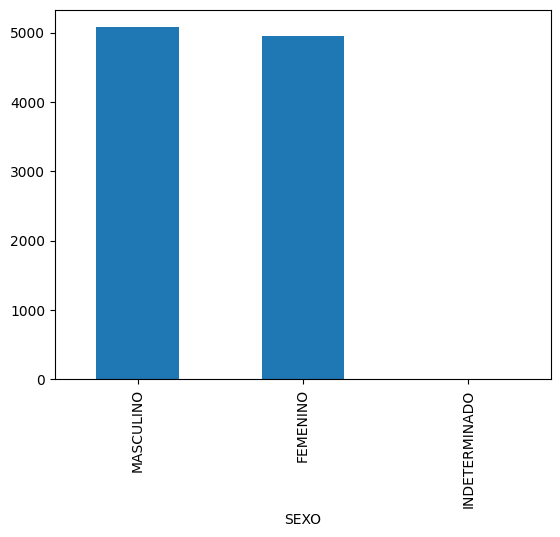

In [10]:
df_relevantes['SEXO'].value_counts().plot(kind='bar')
print(df_relevantes['SEXO'].value_counts())


<Axes: xlabel='TIPO PARTO'>

C:\Users\alexa\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\alexa\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


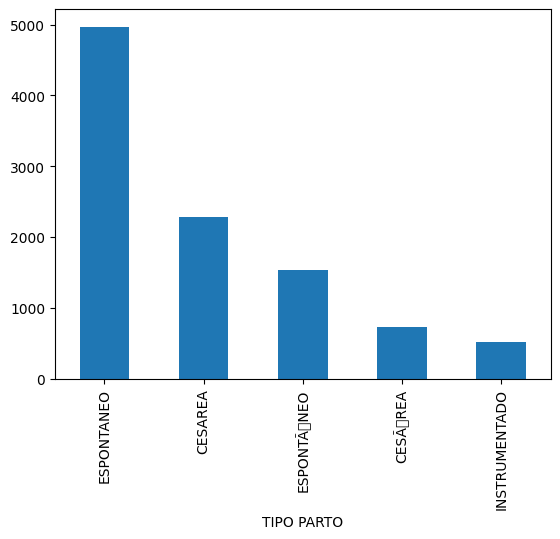

In [11]:
df_relevantes['TIPO PARTO'].value_counts().plot(kind='bar')


In [12]:
df_relevantes['TIPO PARTO'].unique()

['ESPONTANEO', 'CESAREA', 'INSTRUMENTADO', 'ESPONTÃNEO', 'CESÃREA']
Categories (5, object): ['CESAREA', 'CESÃREA', 'ESPONTANEO', 'ESPONTÃNEO', 'INSTRUMENTADO']

In [13]:
#Poner 'ESPONTÃNEO' en 'ESPONTANEO'
df_relevantes['TIPO PARTO'] = df_relevantes['TIPO PARTO'].replace('ESPONTÃNEO', 'ESPONTANEO')

#Poner 'CESÃREA' en 'CESAREA'
df_relevantes['TIPO PARTO'] = df_relevantes['TIPO PARTO'].replace('CESÃREA', 'CESAREA')

C:\Users\alexa\AppData\Local\Temp\ipykernel_17768\1847319756.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_relevantes['TIPO PARTO'] = df_relevantes['TIPO PARTO'].replace('ESPONTÃNEO', 'ESPONTANEO')
C:\Users\alexa\AppData\Local\Temp\ipykernel_17768\1847319756.py:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_relevantes['TIPO PARTO'] = df_relevantes['TIPO PARTO'].replace('CESÃREA', 'CESAREA')


MULTIPLICIDAD EMBARAZO
SIMPLE    9733
DOBLE      296
TRIPLE       9
Name: count, dtype: int64


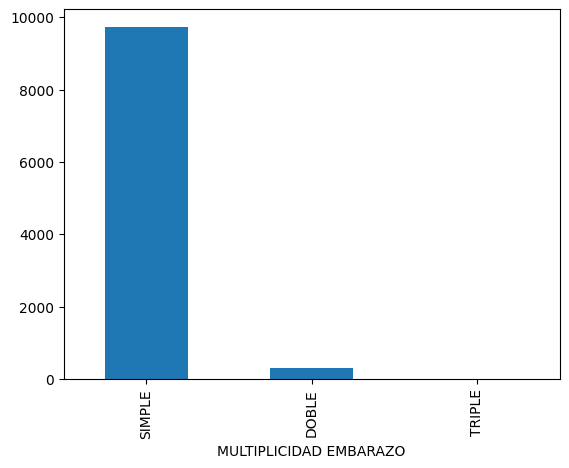

In [14]:
df_relevantes['MULTIPLICIDAD EMBARAZO'].value_counts().plot(kind='bar')
print(df_relevantes['MULTIPLICIDAD EMBARAZO'].value_counts())


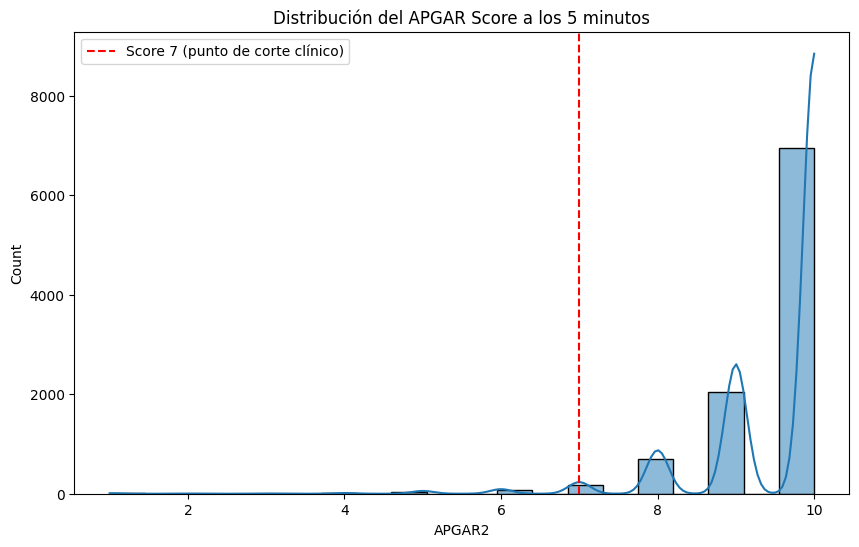

In [15]:
# Visualización de la distribución del APGAR score a los 5 minutos
plt.figure(figsize=(10, 6))
sns.histplot(df_relevantes['APGAR2'].dropna(), kde=True, bins=20)
plt.title('Distribución del APGAR Score a los 5 minutos')
plt.axvline(x=7, color='r', linestyle='--', label='Score 7 (punto de corte clínico)')
plt.legend()
plt.savefig('apgar2_distribucion.png')

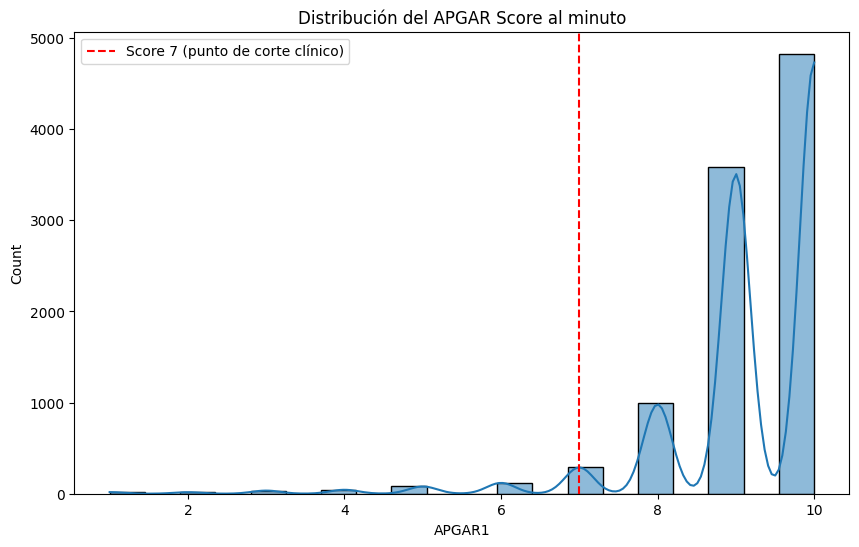

In [16]:
# Visualización de la distribución del APGAR score al minuto
plt.figure(figsize=(10, 6))
sns.histplot(df_relevantes['APGAR1'].dropna(), kde=True, bins=20)
plt.title('Distribución del APGAR Score al minuto')
plt.axvline(x=7, color='r', linestyle='--', label='Score 7 (punto de corte clínico)')
plt.legend()
plt.savefig('apgar1_distribucion.png')

4. LIMPIEZA DE ATÍPICOS

In [17]:
#Como se tiene un solo registro con Sexo como Indeterminado
df_relevantes['SEXO'] = df_relevantes['SEXO'].replace('INDETERMINADO', np.nan)

C:\Users\alexa\AppData\Local\Temp\ipykernel_17768\3972785743.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_relevantes['SEXO'] = df_relevantes['SEXO'].replace('INDETERMINADO', np.nan)


In [18]:
df_relevantes['SEXO'].value_counts()

SEXO
MASCULINO    5077
FEMENINO     4960
Name: count, dtype: int64

In [19]:
numeric_cols = df_relevantes.select_dtypes(include=[np.number]).columns
print(f"\nVariables numéricas para análisis de atípicos: {numeric_cols.tolist()}")


Variables numéricas para análisis de atípicos: ['PESO (Gramos)', 'TALLA (CentImetros)', 'TIEMPO DE GESTACION', 'NUMERO CONSULTAS PRENATALES', 'APGAR1', 'APGAR2', 'EDAD MADRE', 'NUMERO HIJOS NACIDOS VIVOS', 'NUMERO EMBARAZOS']


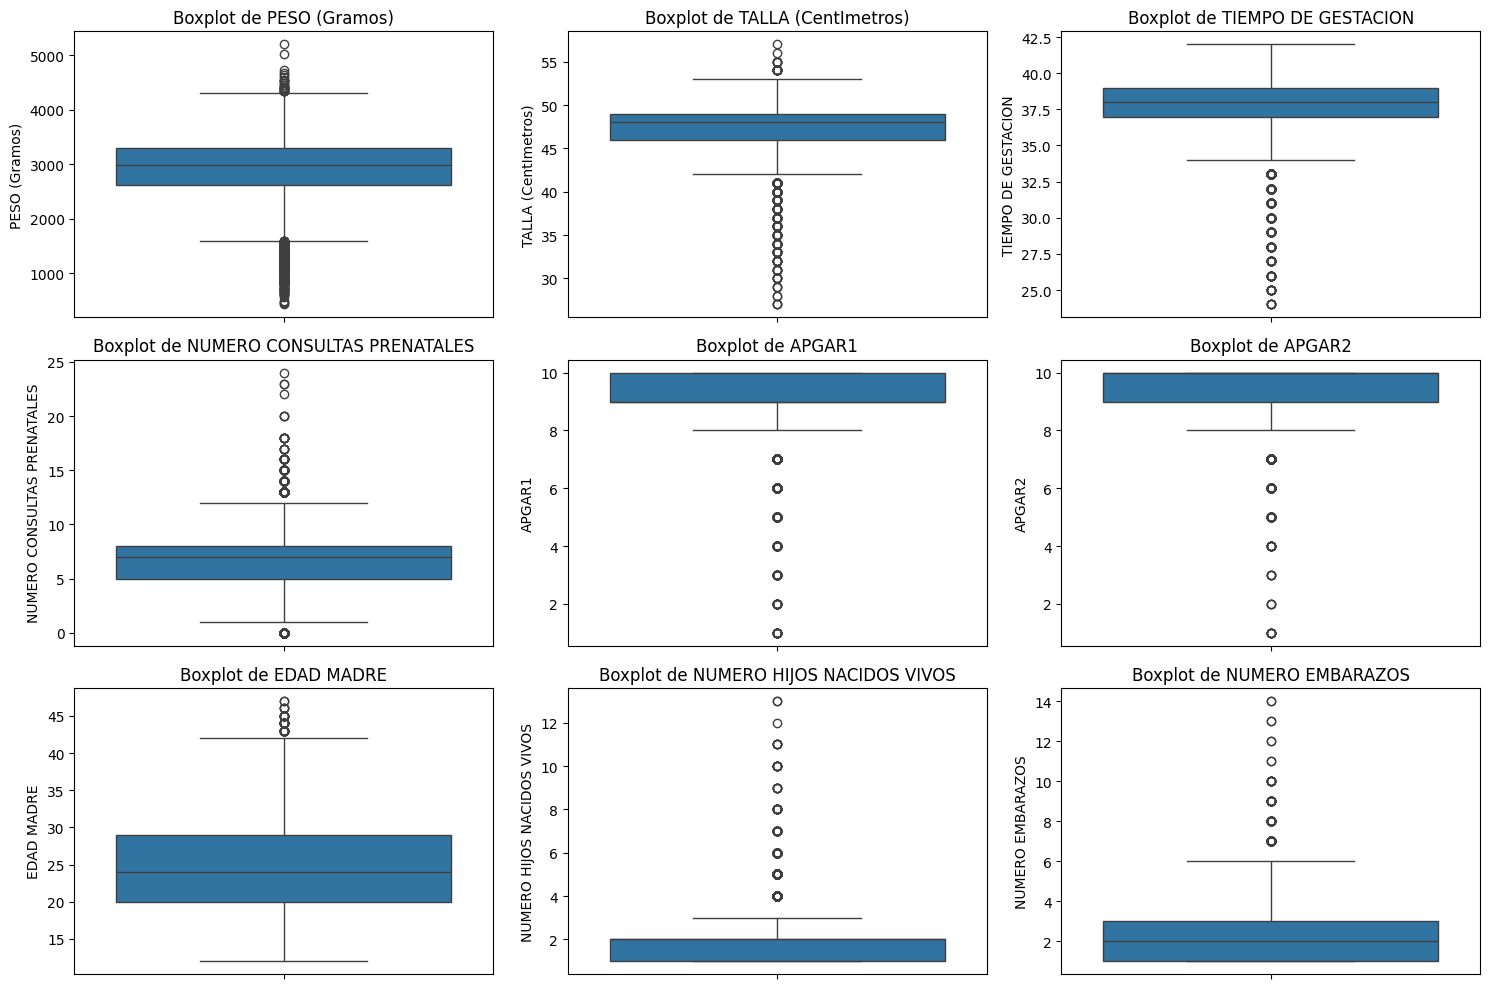

In [20]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df_relevantes[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.savefig('boxplots_variables_numericas.png')

In [21]:
# Examinar casos con pesos extremadamente bajos
bebes_bajo_peso = df_relevantes[df_relevantes['PESO (Gramos)'] < 1000]

# Ver si tienen bajo tiempo de gestación (prematurez extrema)
print(bebes_bajo_peso[['PESO (Gramos)', 'TALLA (CentImetros)', 'TIEMPO DE GESTACION']])

       PESO (Gramos)  TALLA (CentImetros)  TIEMPO DE GESTACION
316            626.0                 32.0                 26.0
374            728.0                 32.0                 28.0
744            700.0                 33.0                 24.0
834            722.0                 34.0                 25.0
1065           800.0                 32.0                 25.0
...              ...                  ...                  ...
9365           710.0                 30.0                 25.0
9367           920.0                 34.0                 25.0
9577           500.0                 29.0                 27.0
9866           912.0                 34.0                 27.0
10007          990.0                 34.0                 30.0

[68 rows x 3 columns]


In [22]:
print("\nCorrelación entre peso y tiempo de gestación:")
correlacion = bebes_bajo_peso['PESO (Gramos)'].corr(bebes_bajo_peso['TIEMPO DE GESTACION'])
print(f"Correlación: {correlacion:.2f}")


Correlación entre peso y tiempo de gestación:
Correlación: 0.34


In [23]:
print("\nPeso promedio por semanas de gestación:")
print(bebes_bajo_peso.groupby('TIEMPO DE GESTACION')['PESO (Gramos)'].agg(['count', 'mean', 'min', 'max']))


Peso promedio por semanas de gestación:
                     count        mean    min    max
TIEMPO DE GESTACION                                 
24.0                     6  695.000000  469.0  876.0
25.0                    11  745.090909  596.0  920.0
26.0                    18  755.055556  430.0  960.0
27.0                     7  865.000000  500.0  970.0
28.0                     8  838.875000  670.0  970.0
29.0                     9  872.666667  780.0  980.0
30.0                     4  877.000000  710.0  990.0
31.0                     4  796.500000  630.0  945.0
32.0                     1  814.000000  814.0  814.0


In [24]:
print("\nCasos que merecen revisión especial:")
casos_sospechosos = bebes_bajo_peso[
    (bebes_bajo_peso['TIEMPO DE GESTACION'] > 36) |  # Gestación normal pero peso muy bajo
    (bebes_bajo_peso['TALLA (CentImetros)'] > 45)    # Talla normal pero peso muy bajo
]
print(casos_sospechosos[['PESO (Gramos)', 'TALLA (CentImetros)', 'TIEMPO DE GESTACION']])



Casos que merecen revisión especial:
Empty DataFrame
Columns: [PESO (Gramos), TALLA (CentImetros), TIEMPO DE GESTACION]
Index: []


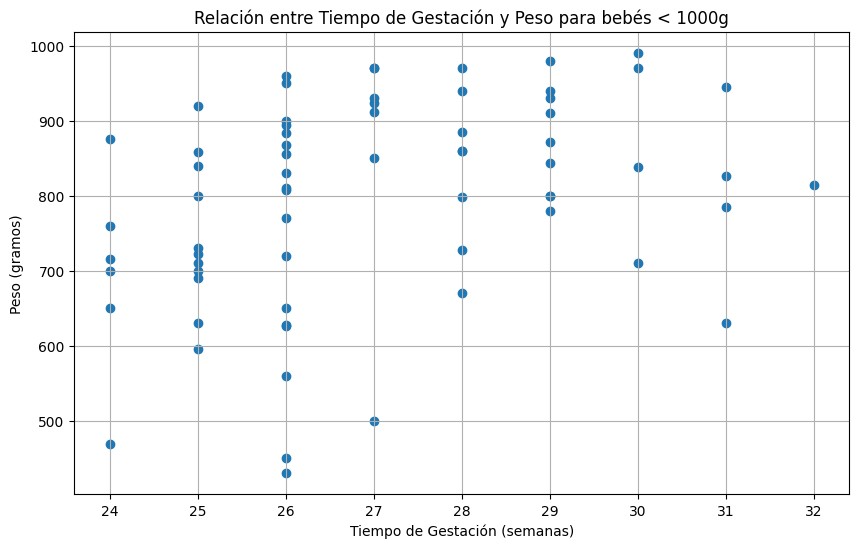

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(bebes_bajo_peso['TIEMPO DE GESTACION'], bebes_bajo_peso['PESO (Gramos)'])
plt.title('Relación entre Tiempo de Gestación y Peso para bebés < 1000g')
plt.xlabel('Tiempo de Gestación (semanas)')
plt.ylabel('Peso (gramos)')
plt.grid(True)
plt.show()

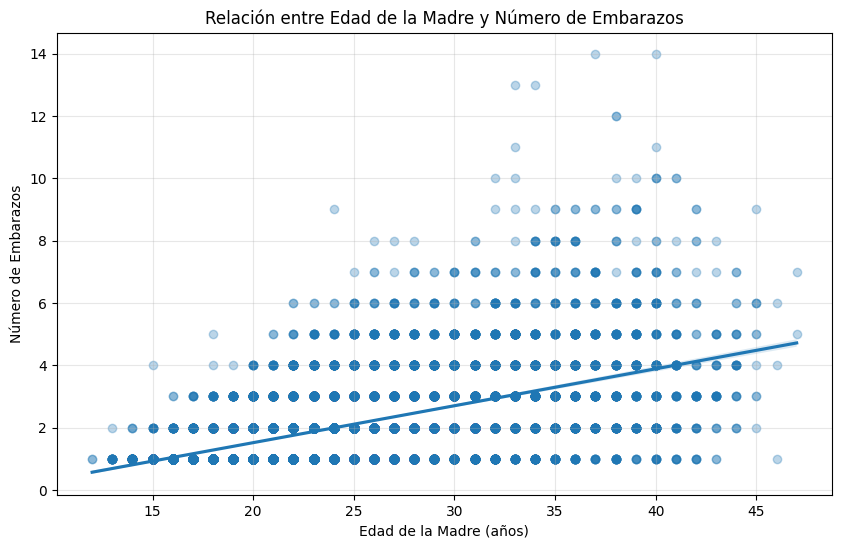

In [26]:
#Análisis general de la relación embarazos-edad
plt.figure(figsize=(10, 6))
sns.regplot(x='EDAD MADRE', y='NUMERO EMBARAZOS', data=df_relevantes, scatter_kws={'alpha':0.3})
plt.title('Relación entre Edad de la Madre y Número de Embarazos')
plt.xlabel('Edad de la Madre (años)')
plt.ylabel('Número de Embarazos')
plt.grid(True, alpha=0.3)
plt.show()

In [27]:
madres_jovenes_multiembarazos = df_relevantes[(df_relevantes['EDAD MADRE'] < 18) & 
                                             (df_relevantes['NUMERO EMBARAZOS'] > 2)]

In [28]:
print(f"\nMadres menores de 18 años con más de 2 embarazos: {len(madres_jovenes_multiembarazos)}")
if len(madres_jovenes_multiembarazos) > 0:
    print(madres_jovenes_multiembarazos[['EDAD MADRE', 'NUMERO EMBARAZOS']])


Madres menores de 18 años con más de 2 embarazos: 9
      EDAD MADRE  NUMERO EMBARAZOS
2741          17                 3
3355          17                 3
3670          15                 4
4164          16                 3
4531          17                 3
5352          17                 3
7564          17                 3
8325          17                 3
8783          16                 3


In [29]:
embarazos_excesivos = df_relevantes[df_relevantes['NUMERO EMBARAZOS'] > (df_relevantes['EDAD MADRE'] - 12)]

In [30]:
print(f"\nMadres con número de embarazos potencialmente incompatible con su edad: {len(embarazos_excesivos)}")
print("\nMuestras de estos casos:")
muestra = embarazos_excesivos[['EDAD MADRE', 'NUMERO EMBARAZOS']].sort_values('NUMERO EMBARAZOS', ascending=False).head(10)
print(muestra)


Madres con número de embarazos potencialmente incompatible con su edad: 4

Muestras de estos casos:
      EDAD MADRE  NUMERO EMBARAZOS
3670          15                 4
819           13                 2
3015          12                 1
8698          12                 1


In [31]:
# Verificar valores máximos
print("Peso máximo:", df_relevantes['PESO (Gramos)'].max(), "gramos")
print("Edad madre máxima:", df_relevantes['EDAD MADRE'].max(), "años")
print("Número máximo de embarazos:", df_relevantes['NUMERO EMBARAZOS'].max())

# Verificar valores mínimos
print("Peso mínimo:", df_relevantes['PESO (Gramos)'].min(), "gramos")
print("Talla mínima:", df_relevantes['TALLA (CentImetros)'].min(), "cm")

Peso máximo: 5200.0 gramos
Edad madre máxima: 47 años
Número máximo de embarazos: 14
Peso mínimo: 430.0 gramos
Talla mínima: 27.0 cm


5. LIMPIEZA DE NULOS

In [32]:
# Verificar valores nulos
df_relevantes.isnull().sum()


SEXO                            1
PESO (Gramos)                   1
TALLA (CentImetros)             1
TIEMPO DE GESTACION             7
NUMERO CONSULTAS PRENATALES     0
TIPO PARTO                      0
MULTIPLICIDAD EMBARAZO          0
APGAR1                         22
APGAR2                         22
EDAD MADRE                      0
NUMERO HIJOS NACIDOS VIVOS      0
NUMERO EMBARAZOS                0
dtype: int64

In [33]:
df_relevantes[df_relevantes.isnull().any(axis=1)]

,SEXO,PESO (Gramos),TALLA (CentImetros),TIEMPO DE GESTACION,NUMERO CONSULTAS PRENATALES,TIPO PARTO,MULTIPLICIDAD EMBARAZO,APGAR1,APGAR2,EDAD MADRE,NUMERO HIJOS NACIDOS VIVOS,NUMERO EMBARAZOS
339,FEMENINO,2566.0,45.0,38.0,6,ESPONTANEO,SIMPLE,NaN,NaN,37,6,6
392,MASCULINO,2712.0,46.0,NaN,0,ESPONTANEO,SIMPLE,NaN,NaN,17,1,1
428,MASCULINO,2836.0,49.0,37.0,4,ESPONTANEO,SIMPLE,NaN,NaN,25,3,3
963,MASCULINO,2689.0,46.0,41.0,0,ESPONTANEO,SIMPLE,NaN,NaN,19,1,2
1139,MASCULINO,3025.0,49.0,39.0,5,ESPONTANEO,SIMPLE,NaN,NaN,34,5,5
1449,MASCULINO,2636.0,44.0,36.0,4,ESPONTANEO,SIMPLE,NaN,NaN,15,1,1
1673,MASCULINO,3150.0,47.0,NaN,0,ESPONTANEO,SIMPLE,NaN,NaN,39,7,7
2968,MASCULINO,3150.0,49.0,40.0,5,ESPONTANEO,SIMPLE,NaN,NaN,22,2,4
2976,MASCULINO,3127.0,50.0,37.0,5,ESPONTANEO,SIMPLE,NaN,NaN,21,2,2
3832,FEMENINO,3000.0,47.0,38.0,10,ESPONTANEO,SIMPLE,NaN,NaN,17,1,1


Para APGAR1 y APGAR2 (22 casos)

Estas variables tienen nulos en los mismos registros. Como APGAR2 es la variable objetivo, se 
eliminan las filas donde APGAR2 es nulo, ya que no se puede predecir la variable objetivo.

In [34]:
# Eliminar filas con APGAR2 nulo 
df_clean = df_relevantes.dropna(subset=['APGAR2'])
print(f"Registros después de eliminar filas con APGAR2 nulo: {len(df_clean)}")

Registros después de eliminar filas con APGAR2 nulo: 10016


In [35]:
df_clean[df_clean.isnull().any(axis=1)]

,SEXO,PESO (Gramos),TALLA (CentImetros),TIEMPO DE GESTACION,NUMERO CONSULTAS PRENATALES,TIPO PARTO,MULTIPLICIDAD EMBARAZO,APGAR1,APGAR2,EDAD MADRE,NUMERO HIJOS NACIDOS VIVOS,NUMERO EMBARAZOS
4872,NaN,2616.0,42.0,36.0,7,ESPONTANEO,SIMPLE,8.0,8.0,18,1,1
5033,MASCULINO,2960.0,48.0,NaN,4,ESPONTANEO,SIMPLE,10.0,10.0,35,9,9
6011,FEMENINO,3545.0,50.0,NaN,0,ESPONTANEO,SIMPLE,10.0,10.0,27,5,5
6695,FEMENINO,2252.0,45.0,NaN,1,ESPONTANEO,SIMPLE,10.0,10.0,27,2,3
7120,MASCULINO,2876.0,47.0,NaN,2,ESPONTANEO,SIMPLE,10.0,10.0,41,10,10


Ahora nos queda un caso dodne el sexo es null, y 4 casos donde tiempo de gestación es null.

El dato nulo de talla y peso se fue junto a uno de los registros que no contenian apgar2.

In [36]:
# Imputar SEXO usando la moda
sexo_moda = df_clean['SEXO'].mode()[0]
df_clean['SEXO'] = df_clean['SEXO'].fillna(sexo_moda)

C:\Users\alexa\AppData\Local\Temp\ipykernel_17768\679479073.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['SEXO'] = df_clean['SEXO'].fillna(sexo_moda)


In [37]:
df_clean[df_clean.isnull().any(axis=1)]

,SEXO,PESO (Gramos),TALLA (CentImetros),TIEMPO DE GESTACION,NUMERO CONSULTAS PRENATALES,TIPO PARTO,MULTIPLICIDAD EMBARAZO,APGAR1,APGAR2,EDAD MADRE,NUMERO HIJOS NACIDOS VIVOS,NUMERO EMBARAZOS
5033,MASCULINO,2960.0,48.0,NaN,4,ESPONTANEO,SIMPLE,10.0,10.0,35,9,9
6011,FEMENINO,3545.0,50.0,NaN,0,ESPONTANEO,SIMPLE,10.0,10.0,27,5,5
6695,FEMENINO,2252.0,45.0,NaN,1,ESPONTANEO,SIMPLE,10.0,10.0,27,2,3
7120,MASCULINO,2876.0,47.0,NaN,2,ESPONTANEO,SIMPLE,10.0,10.0,41,10,10


Para el tiempo de gestación, se usa KNN imputer basado en PESO y TALLA, que son biológicamente relacionados con el tiempo de gestación.

In [38]:
from sklearn.impute import KNNImputer
# Seleccionar solo las columnas numéricas relevantes para la imputación
cols_for_imputation = ['TIEMPO DE GESTACION', 'PESO (Gramos)', 'TALLA (CentImetros)']
# Crear un DataFrame temporal con solo estas columnas
temp_df = df_clean[cols_for_imputation].copy()


In [39]:
# Aplicar KNN imputer
imputer = KNNImputer(n_neighbors=5)
temp_df_imputed = imputer.fit_transform(temp_df)
# Reemplazar los valores imputados solo donde había nulos
df_clean.loc[df_clean['TIEMPO DE GESTACION'].isnull(), 'TIEMPO DE GESTACION'] = (
    pd.DataFrame(temp_df_imputed, columns=cols_for_imputation, index=df_clean.index)
    .loc[df_clean['TIEMPO DE GESTACION'].isnull(), 'TIEMPO DE GESTACION']
)

In [40]:
df_clean.loc[[5033,6011,6695,7120]]

,SEXO,PESO (Gramos),TALLA (CentImetros),TIEMPO DE GESTACION,NUMERO CONSULTAS PRENATALES,TIPO PARTO,MULTIPLICIDAD EMBARAZO,APGAR1,APGAR2,EDAD MADRE,NUMERO HIJOS NACIDOS VIVOS,NUMERO EMBARAZOS
5033,MASCULINO,2960.0,48.0,38.0,4,ESPONTANEO,SIMPLE,10.0,10.0,35,9,9
6011,FEMENINO,3545.0,50.0,39.4,0,ESPONTANEO,SIMPLE,10.0,10.0,27,5,5
6695,FEMENINO,2252.0,45.0,37.0,1,ESPONTANEO,SIMPLE,10.0,10.0,27,2,3
7120,MASCULINO,2876.0,47.0,39.0,2,ESPONTANEO,SIMPLE,10.0,10.0,41,10,10


6. CREACIÓN DE NUEVAS VARIABLES

In [42]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10016 entries, 0 to 10037
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   SEXO                         10016 non-null  category
 1   PESO (Gramos)                10016 non-null  float64 
 2   TALLA (CentImetros)          10016 non-null  float64 
 3   TIEMPO DE GESTACION          10016 non-null  float64 
 4   NUMERO CONSULTAS PRENATALES  10016 non-null  int64   
 5   TIPO PARTO                   10016 non-null  category
 6   MULTIPLICIDAD EMBARAZO       10016 non-null  category
 7   APGAR1                       10016 non-null  float64 
 8   APGAR2                       10016 non-null  float64 
 9   EDAD MADRE                   10016 non-null  int64   
 10  NUMERO HIJOS NACIDOS VIVOS   10016 non-null  int64   
 11  NUMERO EMBARAZOS             10016 non-null  int64   
dtypes: category(3), float64(5), int64(4)
memory usage: 1.0 MB


In [43]:
df_clean = pd.get_dummies(df_clean, columns=['TIPO PARTO', 'MULTIPLICIDAD EMBARAZO'], drop_first=False) 

In [44]:
df_clean = pd.get_dummies(df_clean, columns=['SEXO'], drop_first=True) 

,PESO (Gramos),TALLA (CentImetros),TIEMPO DE GESTACION,NUMERO CONSULTAS PRENATALES,APGAR1,APGAR2,EDAD MADRE,NUMERO HIJOS NACIDOS VIVOS,NUMERO EMBARAZOS,TIPO PARTO_CESAREA,TIPO PARTO_ESPONTANEO,TIPO PARTO_INSTRUMENTADO,MULTIPLICIDAD EMBARAZO_DOBLE,MULTIPLICIDAD EMBARAZO_SIMPLE,MULTIPLICIDAD EMBARAZO_TRIPLE,SEXO_MASCULINO
0,2341.0,44.0,37.0,7,9.0,10.0,18,1,1,False,True,False,False,True,False,False
1,3750.0,51.0,40.0,7,9.0,10.0,23,2,4,False,True,False,False,True,False,True
2,3527.0,51.0,38.0,7,9.0,10.0,25,1,1,False,True,False,False,True,False,True
3,2745.0,47.0,38.0,4,9.0,10.0,26,1,1,False,True,False,False,True,False,False
4,2315.0,43.0,35.0,4,9.0,10.0,31,3,5,False,True,False,False,True,False,False


In [51]:
# Creación de variable binaria para APGAR2
# Se considera normal un APGAR ≥ 7, y problemático un APGAR < 7
df_clean['APGAR_NORMAL'] = (df_clean['APGAR2'] >= 7).astype(int)

In [54]:
# Guardar la variable original para posibles análisis futuros 
df_clean_con_apgar2 = df_clean.copy()

# Eliminar APGAR2 del dataset de modelado
df_clean.drop(columns=['APGAR2'], inplace=True)
df_clean.head()

,PESO (Gramos),TALLA (CentImetros),TIEMPO DE GESTACION,NUMERO CONSULTAS PRENATALES,APGAR1,EDAD MADRE,NUMERO HIJOS NACIDOS VIVOS,NUMERO EMBARAZOS,TIPO PARTO_CESAREA,TIPO PARTO_ESPONTANEO,TIPO PARTO_INSTRUMENTADO,MULTIPLICIDAD EMBARAZO_DOBLE,MULTIPLICIDAD EMBARAZO_SIMPLE,MULTIPLICIDAD EMBARAZO_TRIPLE,SEXO_MASCULINO,APGAR_NORMAL
0,2341.0,44.0,37.0,7,9.0,18,1,1,False,True,False,False,True,False,False,1
1,3750.0,51.0,40.0,7,9.0,23,2,4,False,True,False,False,True,False,True,1
2,3527.0,51.0,38.0,7,9.0,25,1,1,False,True,False,False,True,False,True,1
3,2745.0,47.0,38.0,4,9.0,26,1,1,False,True,False,False,True,False,False,1
4,2315.0,43.0,35.0,4,9.0,31,3,5,False,True,False,False,True,False,False,1


7. ANÁLISIS DE CORRELACIONES PARA REDUNDANCIA

In [55]:
matriz = df_clean.corr()
matriz

,PESO (Gramos),TALLA (CentImetros),TIEMPO DE GESTACION,NUMERO CONSULTAS PRENATALES,APGAR1,EDAD MADRE,NUMERO HIJOS NACIDOS VIVOS,NUMERO EMBARAZOS,TIPO PARTO_CESAREA,TIPO PARTO_ESPONTANEO,TIPO PARTO_INSTRUMENTADO,MULTIPLICIDAD EMBARAZO_DOBLE,MULTIPLICIDAD EMBARAZO_SIMPLE,MULTIPLICIDAD EMBARAZO_TRIPLE,SEXO_MASCULINO,APGAR_NORMAL
PESO (Gramos),1.000000,0.870379,0.758948,0.169394,0.243926,0.031294,0.008113,0.023259,-0.109885,0.063307,0.090908,-0.227108,0.229709,-0.033690,0.071454,0.116261
TALLA (CentImetros),0.870379,1.000000,0.763724,0.154106,0.254254,0.007456,-0.010145,-0.002027,-0.169161,0.114052,0.104171,-0.201966,0.204546,-0.031487,0.090785,0.122361
TIEMPO DE GESTACION,0.758948,0.763724,1.000000,0.167338,0.311760,-0.027380,-0.049836,-0.045800,-0.152808,0.104617,0.090674,-0.216846,0.220748,-0.040290,-0.007226,0.155882
NUMERO CONSULTAS PRENATALES,0.169394,0.154106,0.167338,1.000000,0.072880,0.103750,-0.143447,-0.108901,0.007682,-0.024427,0.036760,-0.016915,0.018245,-0.009011,-0.014316,0.051499
APGAR1,0.243926,0.254254,0.311760,0.072880,1.000000,-0.014626,0.001490,0.001194,-0.130556,0.154115,-0.062073,-0.082107,0.085285,-0.024989,-0.021367,0.476523
EDAD MADRE,0.031294,0.007456,-0.027380,0.103750,-0.014626,1.000000,0.531701,0.547424,0.158818,-0.132740,-0.042486,0.034258,-0.040437,0.038210,-0.012833,-0.004702
NUMERO HIJOS NACIDOS VIVOS,0.008113,-0.010145,-0.049836,-0.143447,0.001490,0.531701,1.000000,0.878090,0.053729,0.004372,-0.120601,0.159093,-0.172918,0.092326,-0.005865,0.006771
NUMERO EMBARAZOS,0.023259,-0.002027,-0.045800,-0.108901,0.001194,0.547424,0.878090,1.000000,0.055173,-0.002874,-0.107970,0.069602,-0.078203,0.055010,-0.012204,0.004423
TIPO PARTO_CESAREA,-0.109885,-0.169161,-0.152808,0.007682,-0.130556,0.158818,0.053729,0.055173,1.000000,-0.888744,-0.153374,0.192131,-0.197337,0.045710,0.002808,-0.033639
TIPO PARTO_ESPONTANEO,0.063307,0.114052,0.104617,-0.024427,0.154115,-0.132740,0.004372,-0.002874,-0.888744,1.000000,-0.316670,-0.168006,0.172672,-0.040624,-0.021356,0.061704


In [ ]:
# Identificar pares de variables con alta correlación (potencialmente redundantes)

#La correlación de 0.870379 entre peso y talla es bastante alta, lo que indica multicolinealidad.


8. ANÁLISIS DE CORRELACIONES PARA IRRELEVANCIA (PREDICCIONES)

Para un modelo predictivo médico como el de APGAR, es preferible mantener variables con incluso pequeñas correlaciones (>0.05) ya que podrían tener relevancia clínica no capturada completamente por la correlación lineal simple.

estos son los que estan por fuera:

- edad madre
- num hijos vivos
- num embarazos
- tipo parto  cesarea
- multiplicidad embarazo doble
- multiplicidad embarazo simple
- multiplicidad embarazo triple
- sexo_masculino

Para un modelo predictivo médico como el de APGAR, es preferible mantener variables con incluso pequeñas correlaciones (>0.05) ya que podrían tener relevancia clínica no capturada completamente por la correlación lineal simple.

estos son los que estan por fuera:

- edad madre
- num hijos vivos
- num embarazos
- tipo parto  cesarea
- multiplicidad embarazo doble
- multiplicidad embarazo simple
- multiplicidad embarazo triple
- sexo_masculino

9. REDUCCIÓN DE DIMENSIÓN (OPCIONAL EN PREDICCIONES)

10. BALANCEO (CLASIFICACIÓN)

11. TRANSFORMACIONES